In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [5]:
df=pd.read_csv("news.csv")

In [6]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [7]:
df1=df[["text","title","label"]]

In [8]:
df2=df1.dropna()
#dropna() function return Index without NA/NaN values. All the missing values are removed and a new object is returned which does not have any NaN values present in it. If the Index is a MultiIndex, drop the value when any or all levels are NaN.

In [9]:
df2=df2[df2['label'].str.contains('REAL')|df2['label'].str.contains('FAKE')]
labels=df2.label

In [10]:
labels # as y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [11]:
x=df2["text"]

In [12]:
x

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [13]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.7)
X=tfidf_vectorizer.fit_transform(x)

# feature name

In [14]:
print(X.shape)
print(tfidf_vectorizer.get_feature_names())

(6335, 67351)
['00', '000', '0000', '000000031', '00000031', '000035', '00006', '0001', '0001pt', '0002', '000billion', '000ft', '000km', '000x', '001', '0011', '002', '003', '004', '004s', '005', '005s', '006', '00684', '006s', '007', '007s', '008', '008s', '009', '0099', '00am', '00p', '00pm', '01', '010', '011', '012', '013', '013c2812c9', '014', '015', '016', '018', '01am', '02', '020', '022', '023', '024', '025', '027', '02714', '028', '02870', '02welcome', '03', '030', '031', '032', '0325', '033', '034', '035', '037', '03747', '039', '03eb', '04', '040', '0400', '042', '044', '047', '048', '049', '04pm', '05', '050', '0509245d29', '052', '053', '056', '058', '06', '0600', '062', '063', '0640', '066', '068', '06pm', '07', '0700', '071', '075', '0750', '076', '079', '07dryempjx', '08', '080', '081', '082', '084', '0843', '085', '0851', '089', '0891', '09', '091', '093', '098263', '09am', '09pm', '0_65b67362bd', '0_jgdktlmn', '0_kvyhphja', '0a_merrill', '0b6njlny5j', '0d', '0dpbdk6r

In [15]:
#knn

In [16]:
knn=KNeighborsClassifier(n_neighbors=5)

In [17]:
knn_score=cross_val_score(knn,X,labels,cv=10)

In [18]:
np.mean(knn_score)

0.5704818076257967

In [19]:
knn_score*100

array([57.2555205 , 57.0977918 , 57.41324921, 56.94006309, 56.30914826,
       57.9778831 , 56.0821485 , 57.81990521, 57.0300158 , 56.55608215])

In [20]:
knn_score.mean()*100

57.04818076257967

In [21]:
#NB
nb=GaussianNB()
nb_score=cross_val_score(nb,X.toarray(),labels,cv=10)

In [22]:
nb_score.mean()*100

80.25199216589172

In [23]:
#svm
svm = svm.SVC()
svm_score=cross_val_score(svm,X,labels,cv=10)

In [24]:

svm_score.mean()*100

93.30707013320973

In [25]:
#dt
dt=DecisionTreeClassifier()
dt_score=cross_val_score(dt,X,labels,cv=10)

In [26]:
dt_score.mean()*100

81.8152007614833

In [27]:
nn=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)


In [28]:
nn_score=cross_val_score(nn,X,labels,cv=10)

E:\anaconda install\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [29]:
nn_score*100

array([94.16403785, 92.11356467, 92.9022082 , 91.16719243, 94.00630915,
       93.20695103, 94.78672986, 94.47077409, 94.15481833, 94.15481833])

In [30]:
nn_score.mean()*100

93.51274039300114

In [31]:
#accuracy of all classifier 

In [32]:
knn_score.mean()*100,nb_score.mean()*100,svm_score.mean()*100,dt_score.mean()*100,nn_score.mean()*100

(57.04818076257967,
 80.25199216589172,
 93.30707013320973,
 81.8152007614833,
 93.51274039300114)

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text yticklabel objects>)

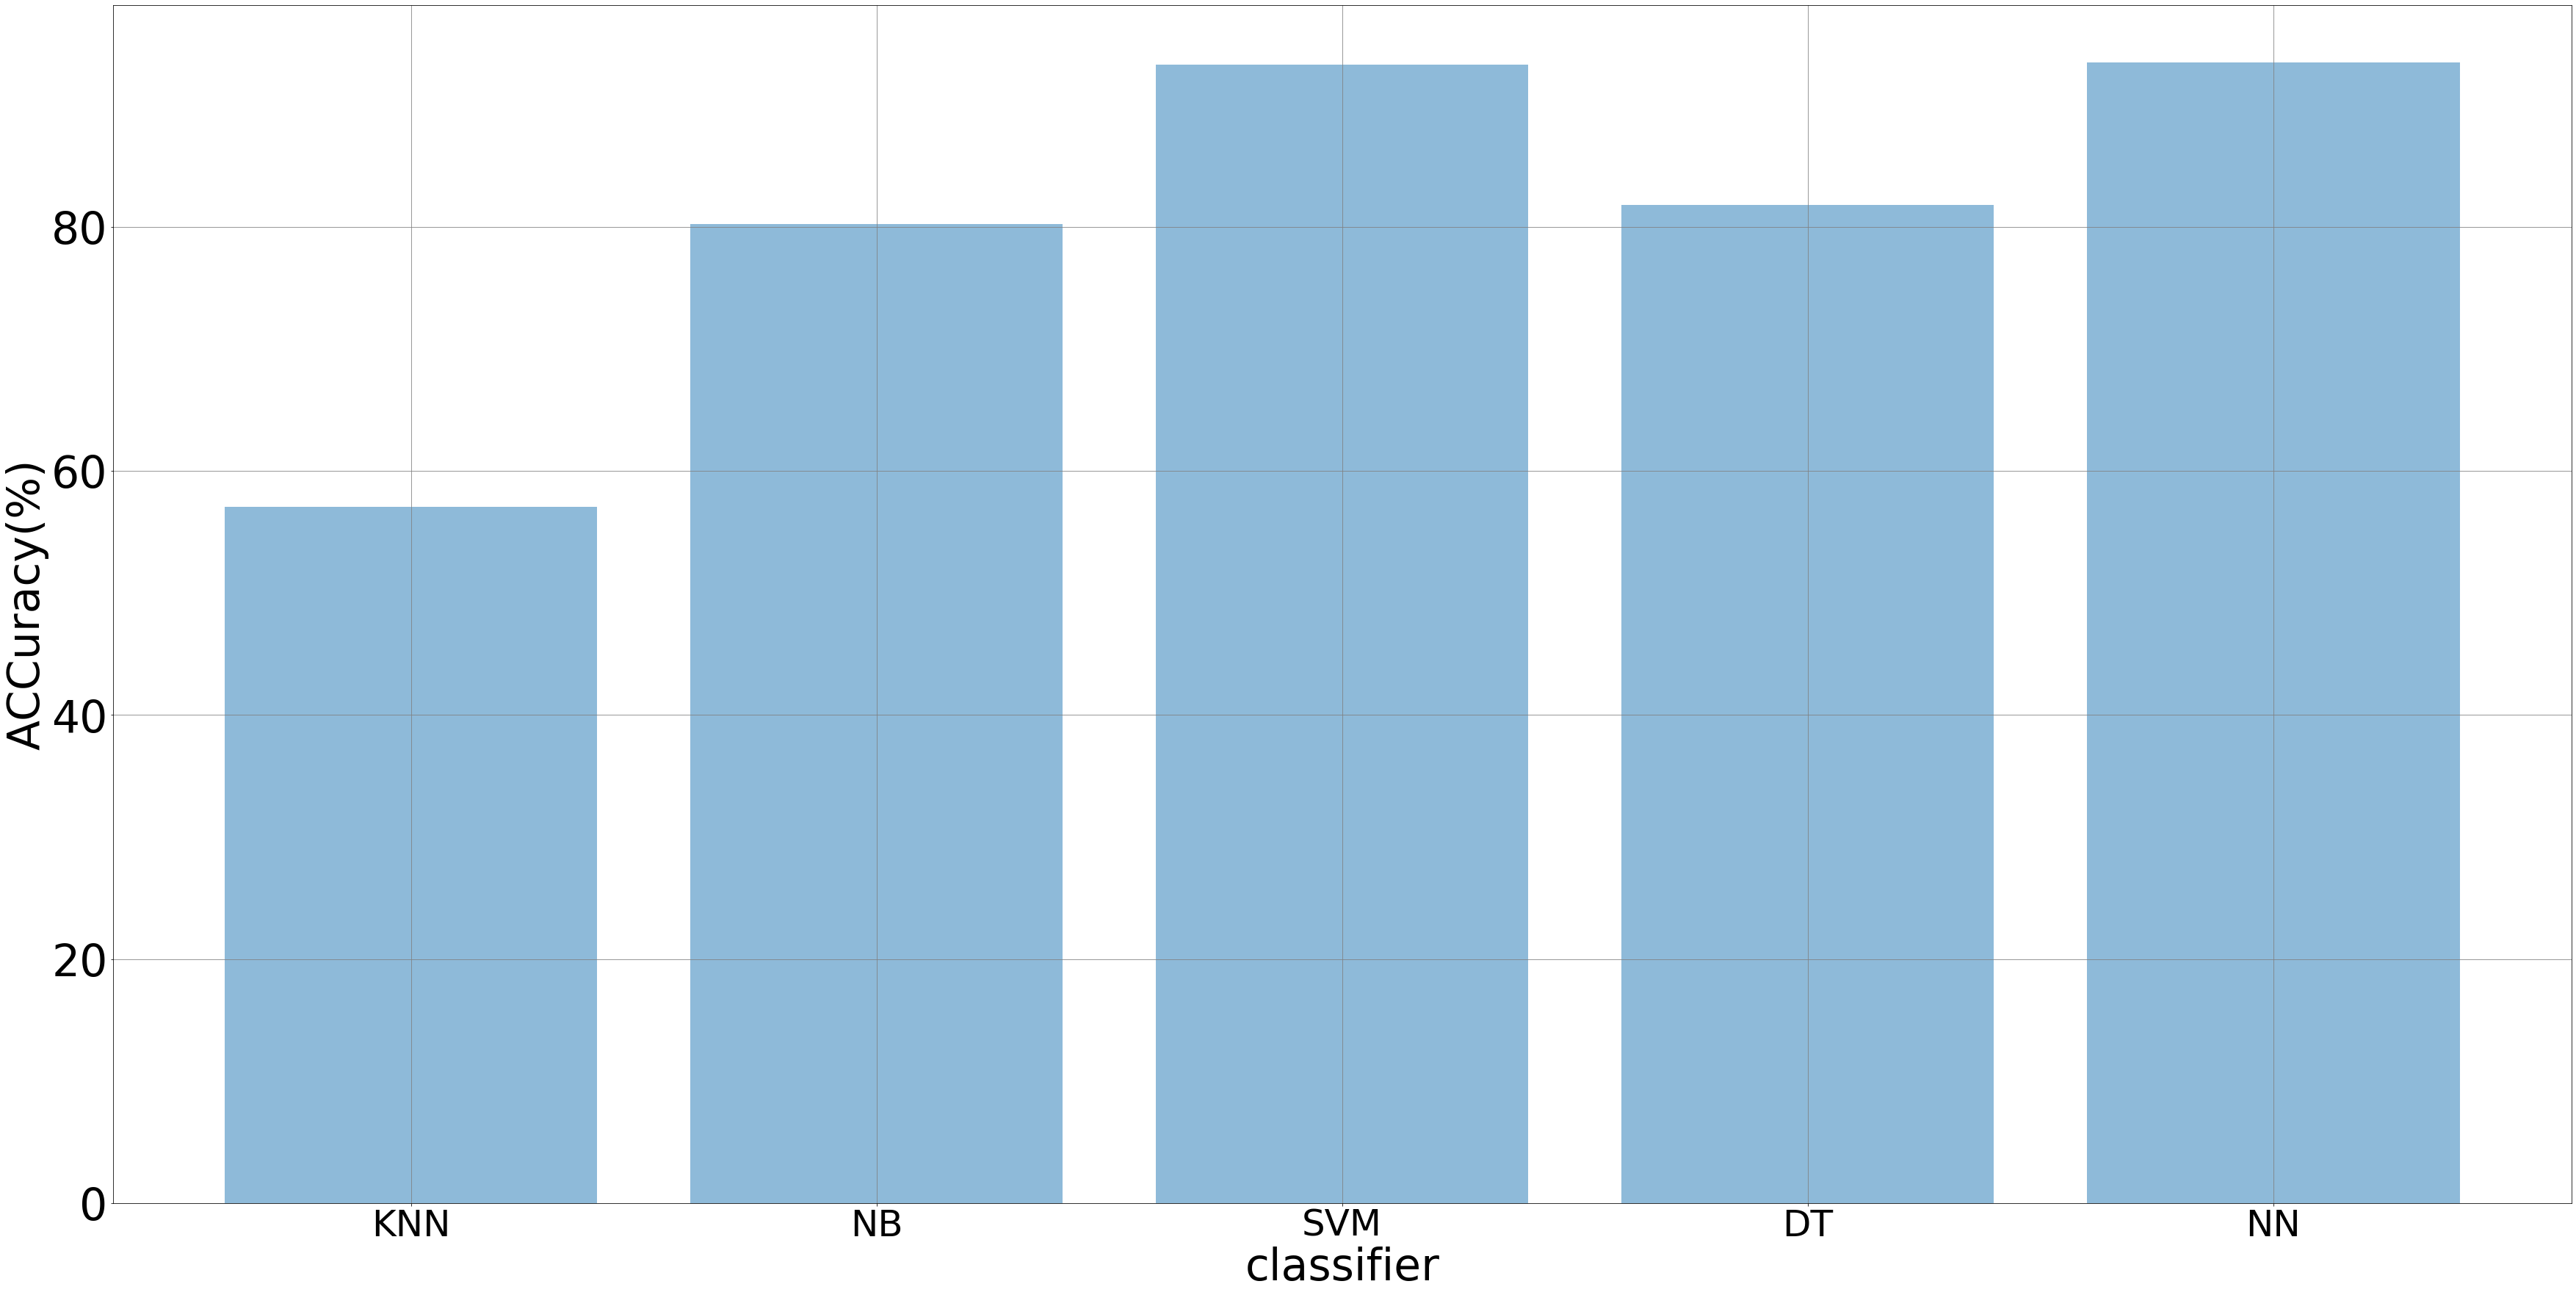

In [119]:
#bar chart
objects = ('KNN', 'NB', 'SVM', 'DT', 'NN')
y_pos = np.arange(len(objects))
performance = [knn_score.mean()*100,nb_score.mean()*100,svm_score.mean()*100,dt_score.mean()*100,nn_score.mean()*100]
plt.figure(figsize=(60,30))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('ACCuracy(%)', size = 60)
plt.xlabel('classifier', size = 60)
plt.grid(True,color='grey')
plt.xticks(size = 50)
plt.yticks(size = 60)

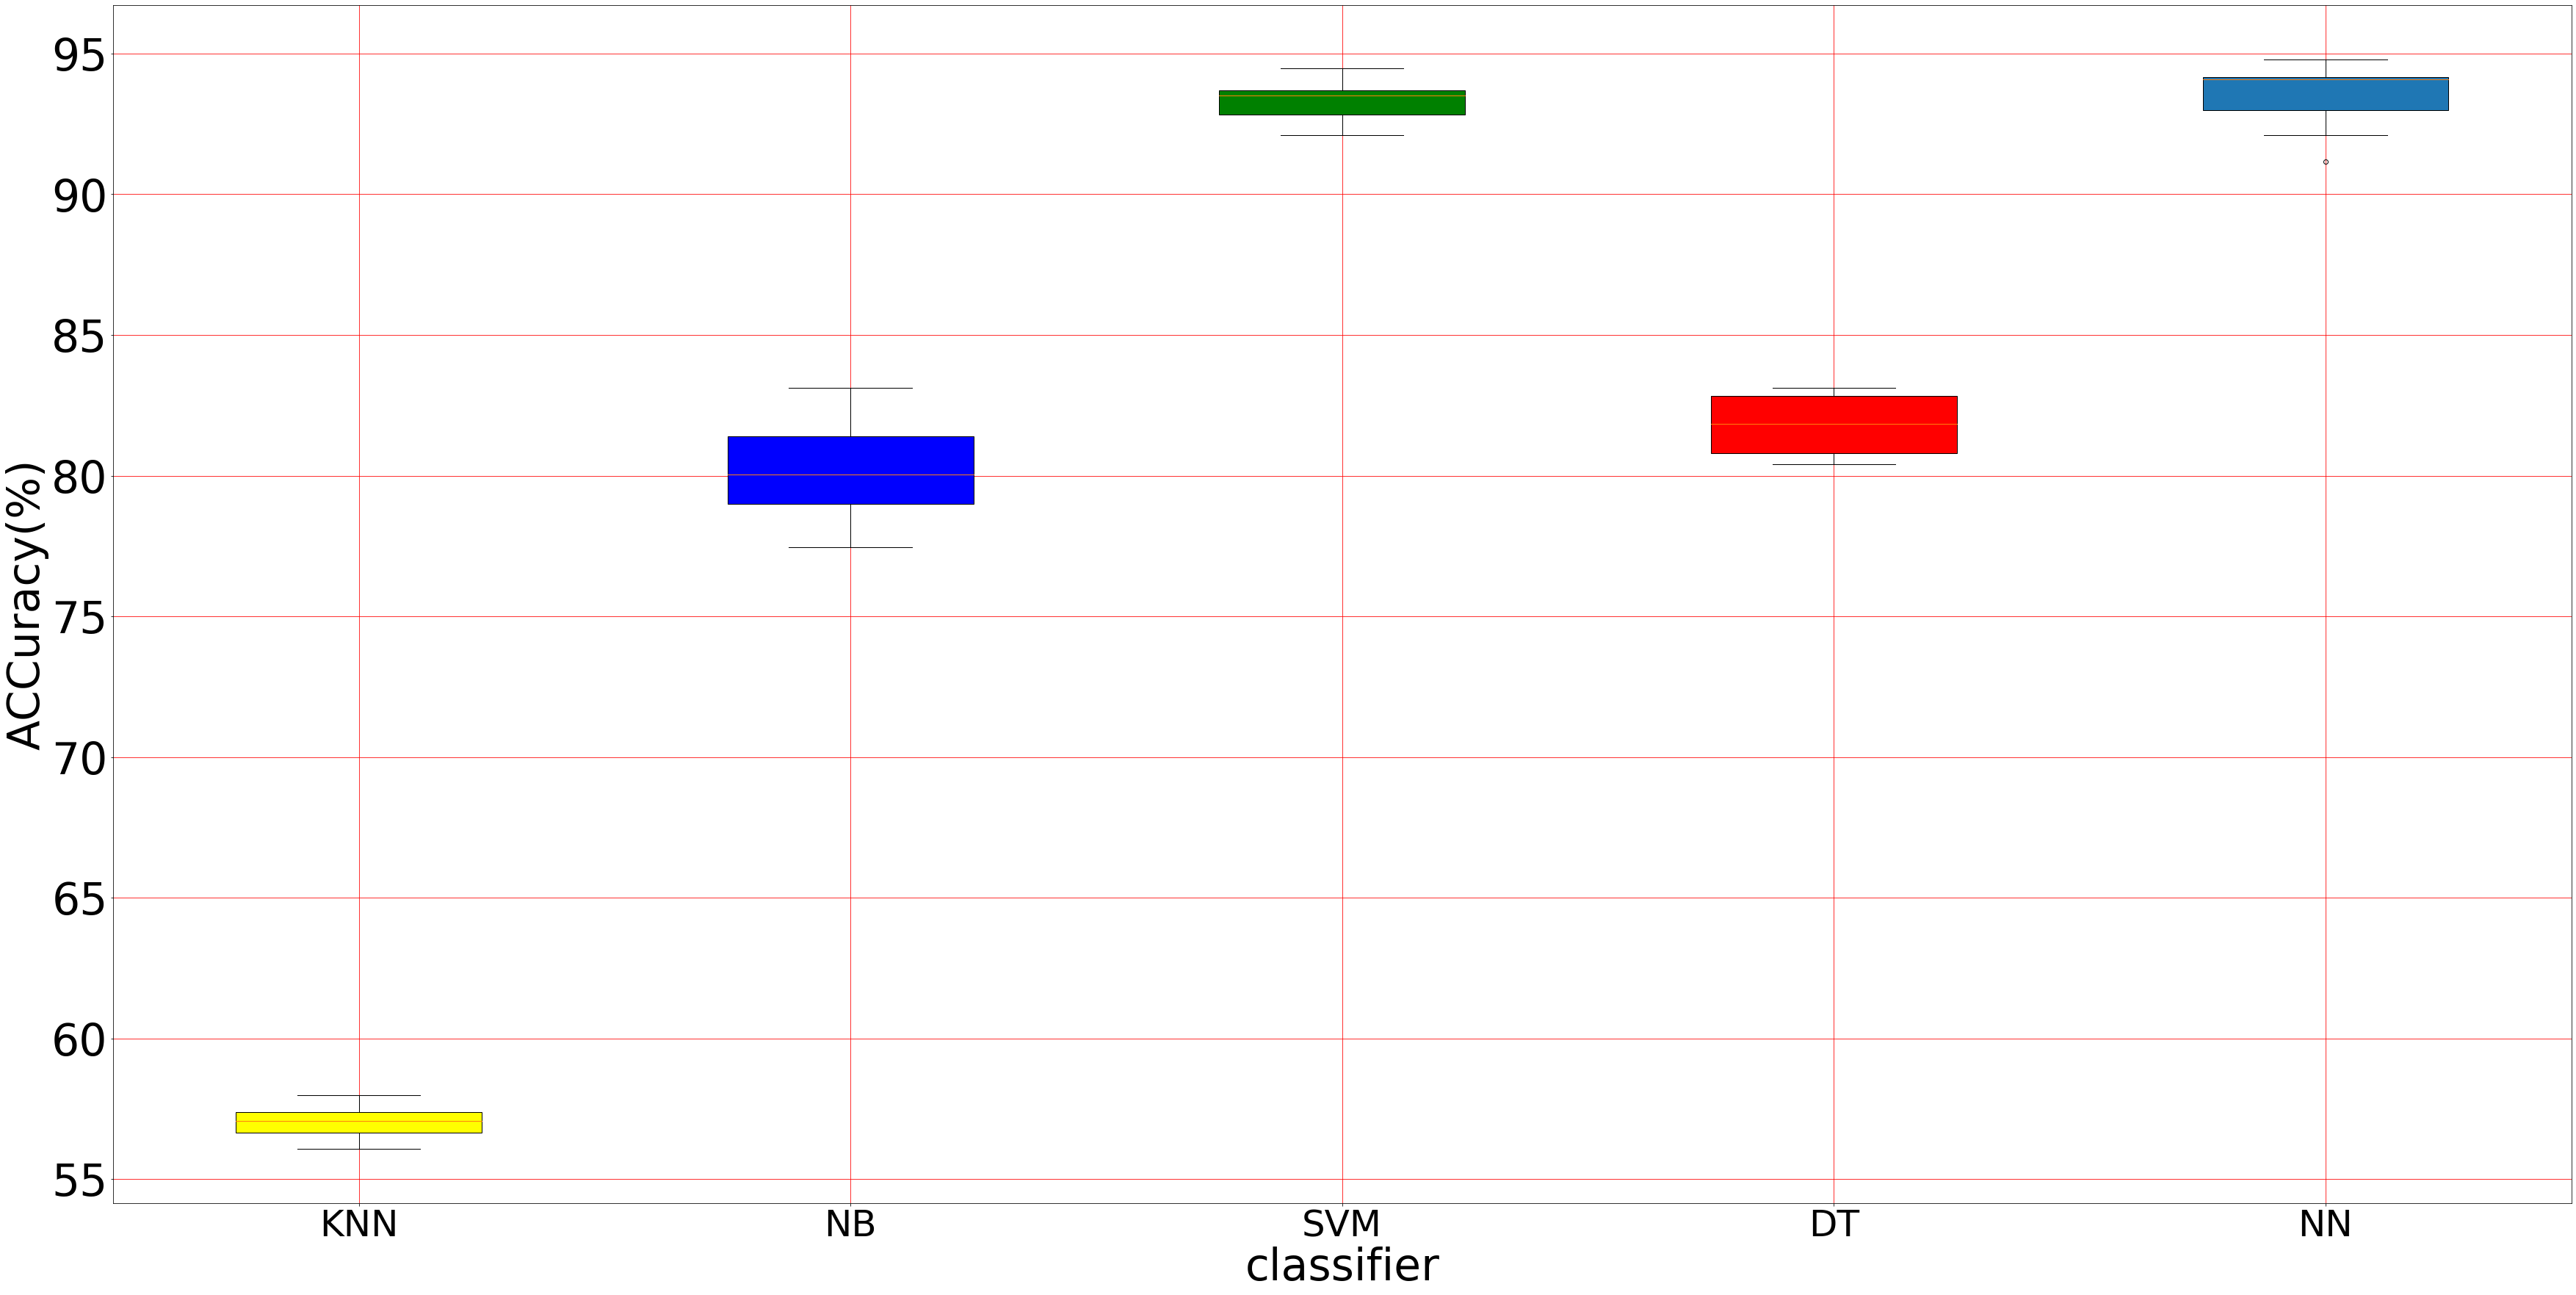

In [34]:
#Create box plot in python with fills and labels:
import matplotlib.pyplot as plt
 
box_plot_data=[knn_score*100,nb_score*100,svm_score*100,dt_score*100,nn_score*100]

plt.figure(figsize=(60,30))
box=plt.boxplot(box_plot_data,patch_artist=True,labels=['KNN','NB','SVM','DT',"NN"])

colors = ['yellow', 'blue', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
 
plt.ylabel('ACCuracy(%)', size = 60)
plt.xlabel('classifier', size = 60)

plt.xticks(size = 50)
plt.yticks(size = 60)
plt.grid(True,color='red')
plt.show()

In [35]:
#box plot in python with notch

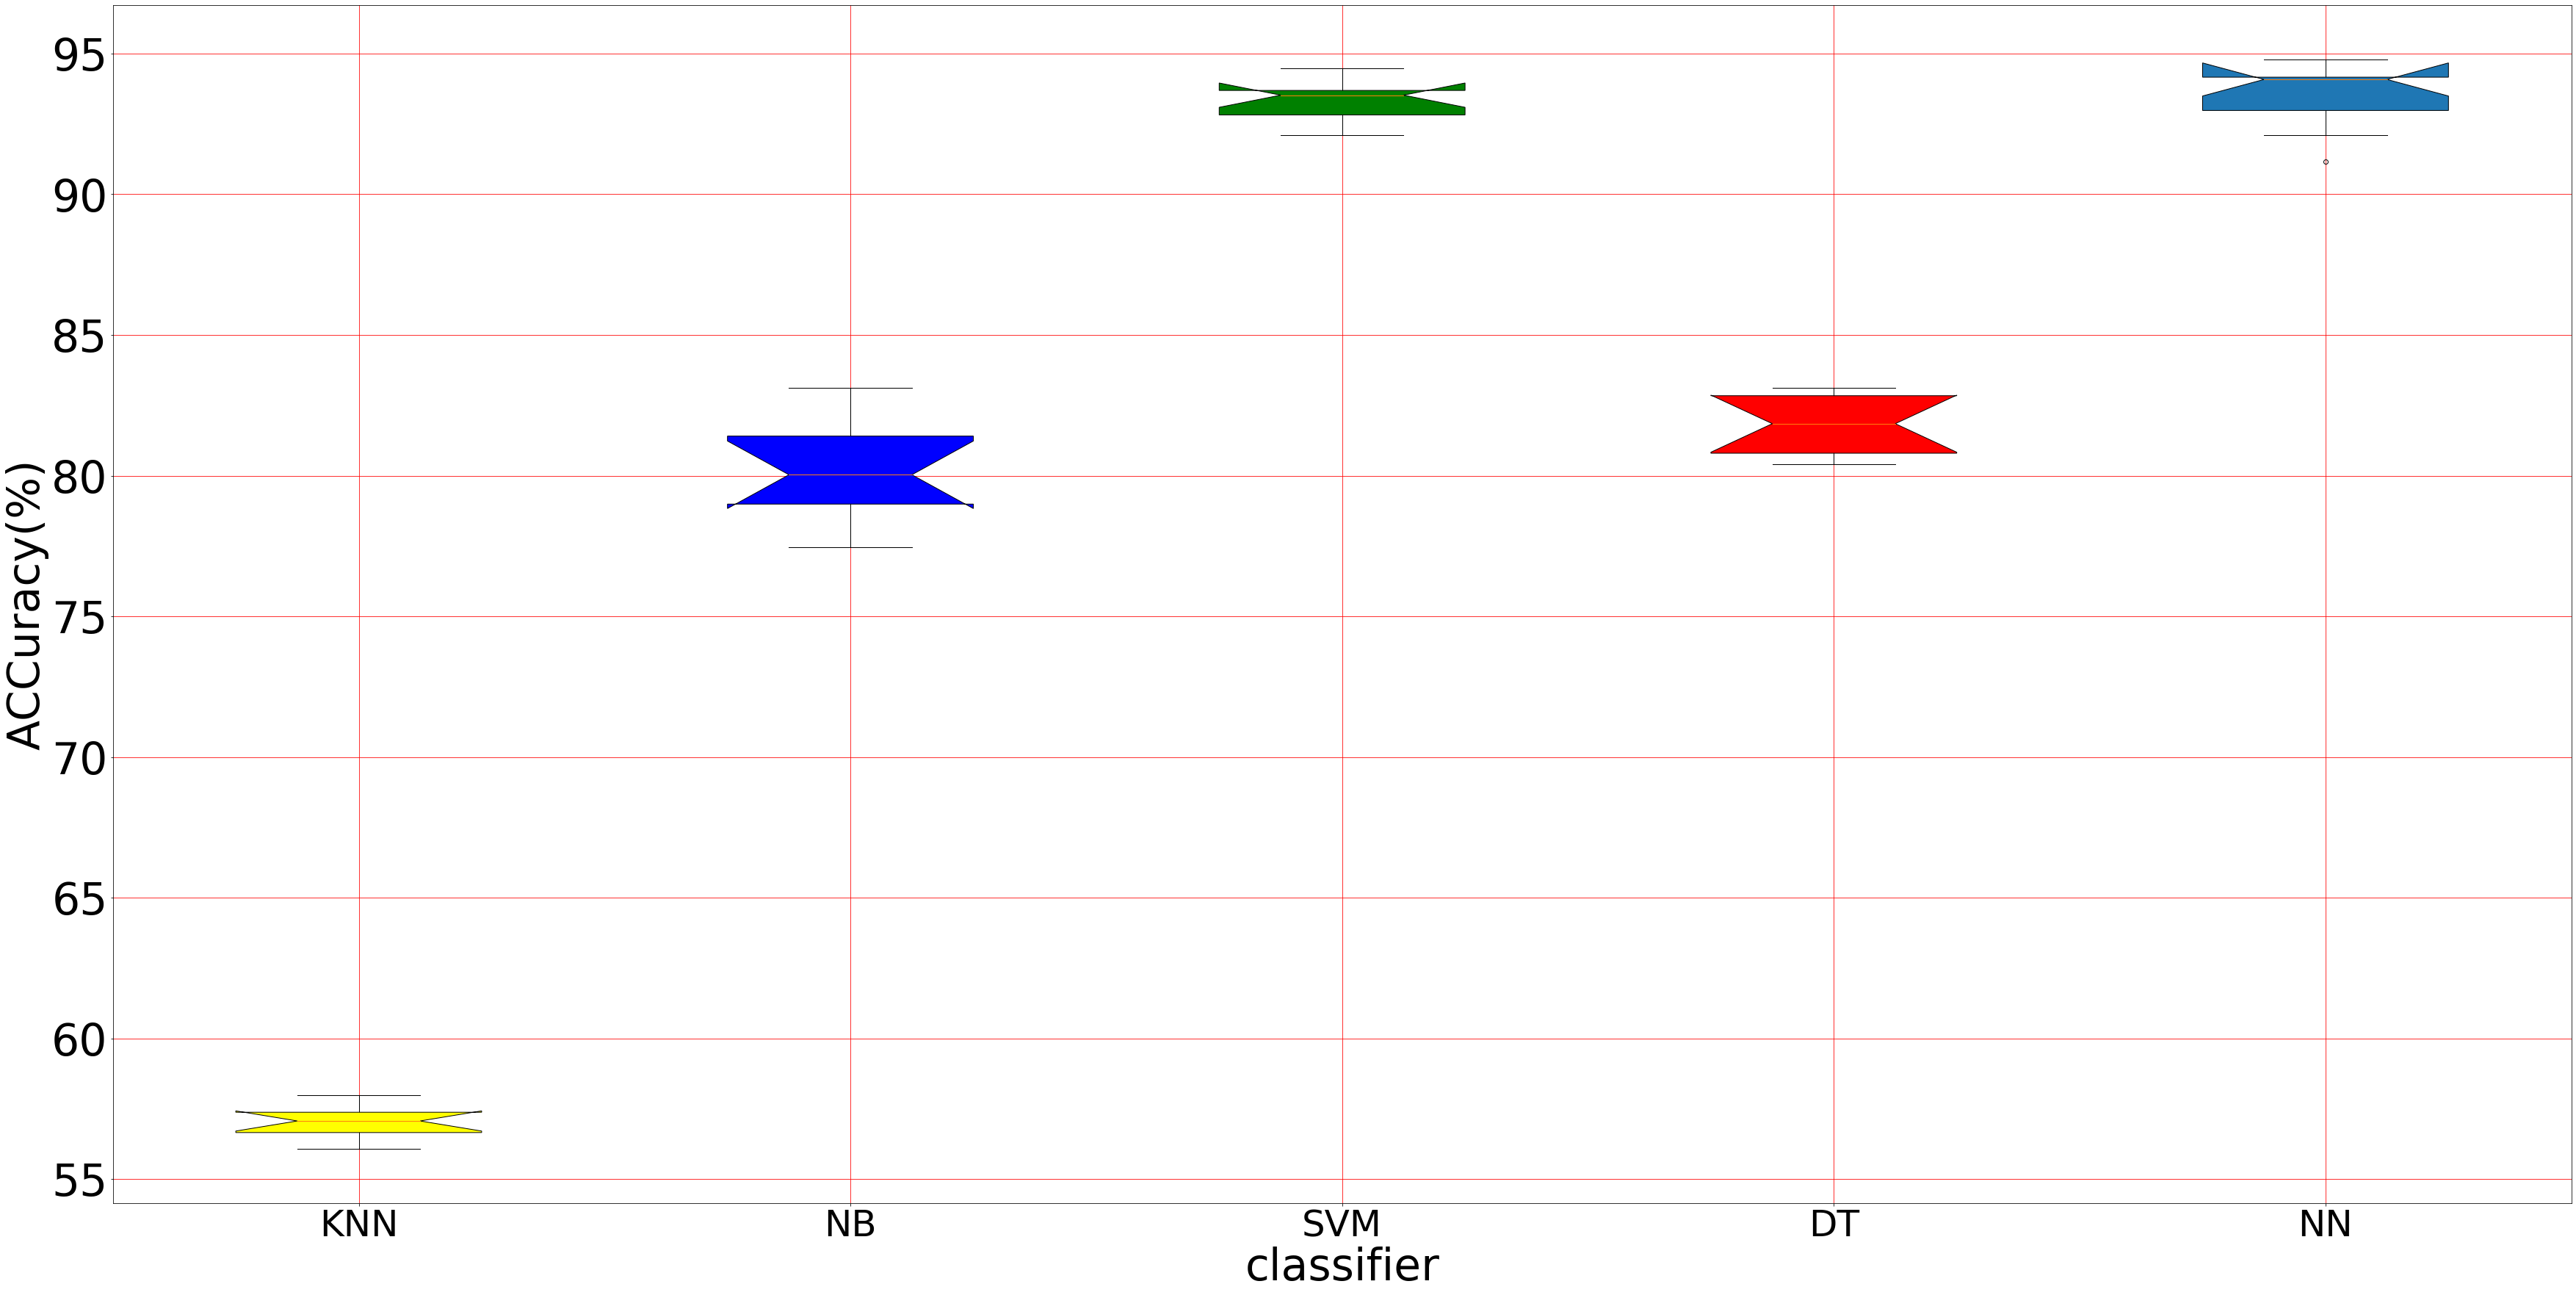

In [36]:
 
box_plot_data=[knn_score*100,nb_score*100,svm_score*100,dt_score*100,nn_score*100]
plt.figure(figsize=(60,30))
box=plt.boxplot(box_plot_data,notch='True',patch_artist=True,labels=['KNN','NB','SVM','DT',"NN"])
colors = ['yellow', 'blue', 'green', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
 
plt.ylabel('ACCuracy(%)', size = 60)
plt.xlabel('classifier', size = 60)

plt.xticks(size = 50)
plt.yticks(size = 60)
plt.grid(True,color='red')
plt.show()

# pca

In [37]:
from sklearn.decomposition import PCA,TruncatedSVD

In [38]:
print(X.shape)
labels
pca=PCA(n_components=10,whiten='True')

(6335, 67351)


In [39]:
cx=pca.fit(X.toarray()).transform(X.toarray())
#cx after pca as x

In [40]:
print(cx.shape)

(6335, 10)


In [41]:
knn_scorepca=cross_val_score(knn,cx,labels,cv=10)

In [42]:
knn_scorepca.mean()

0.8662998789002347

In [43]:
#nb pca
nb_scorepca=cross_val_score(nb,cx,labels,cv=10)

In [44]:
nb_scorepca.mean()

0.7190178958542017

In [45]:
#svm pca
svm_scorepca=cross_val_score(svm,cx,labels,cv=10)
svm_scorepca.mean()

0.8715091622188667

In [46]:
#dt pca
dt_scorepca=cross_val_score(dt,cx,labels,cv=10)
dt_scorepca.mean()

0.8287330373116848

In [47]:
#nn pca
nn_scorepca=cross_val_score(nn,cx,labels,cv=10)
nn_scorepca.mean()

E:\anaconda install\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\anaconda install\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
E:\anaconda install\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED

0.8697714055048065

In [48]:
#accuracy  normal
knn_score.mean()*100,nb_score.mean()*100,svm_score.mean()*100,dt_score.mean()*100,nn_score.mean()*100


(57.04818076257967,
 80.25199216589172,
 93.30707013320973,
 81.8152007614833,
 93.51274039300114)

In [49]:
#after applied pca
knn_scorepca.mean()*100,nb_scorepca.mean()*100,svm_scorepca.mean()*100,dt_scorepca.mean()*100,nn_scorepca.mean()*100

(86.62998789002347,
 71.90178958542018,
 87.15091622188666,
 82.87330373116848,
 86.97714055048064)

Text(0.5, 1.0, 'all classifier')

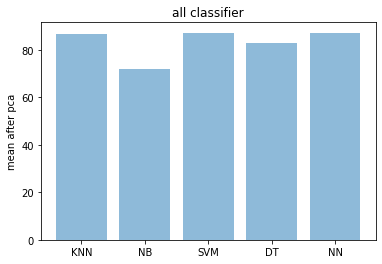

In [50]:
#bar chart after using pca
objects = ('KNN', 'NB', 'SVM', 'DT', 'NN')
y_pos = np.arange(len(objects))
performance = [knn_scorepca.mean()*100,nb_scorepca.mean()*100,svm_scorepca.mean()*100,dt_scorepca.mean()*100,nn_scorepca.mean()*100]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('mean after pca')
plt.title('all classifier')

In [51]:
#compare chart bar 

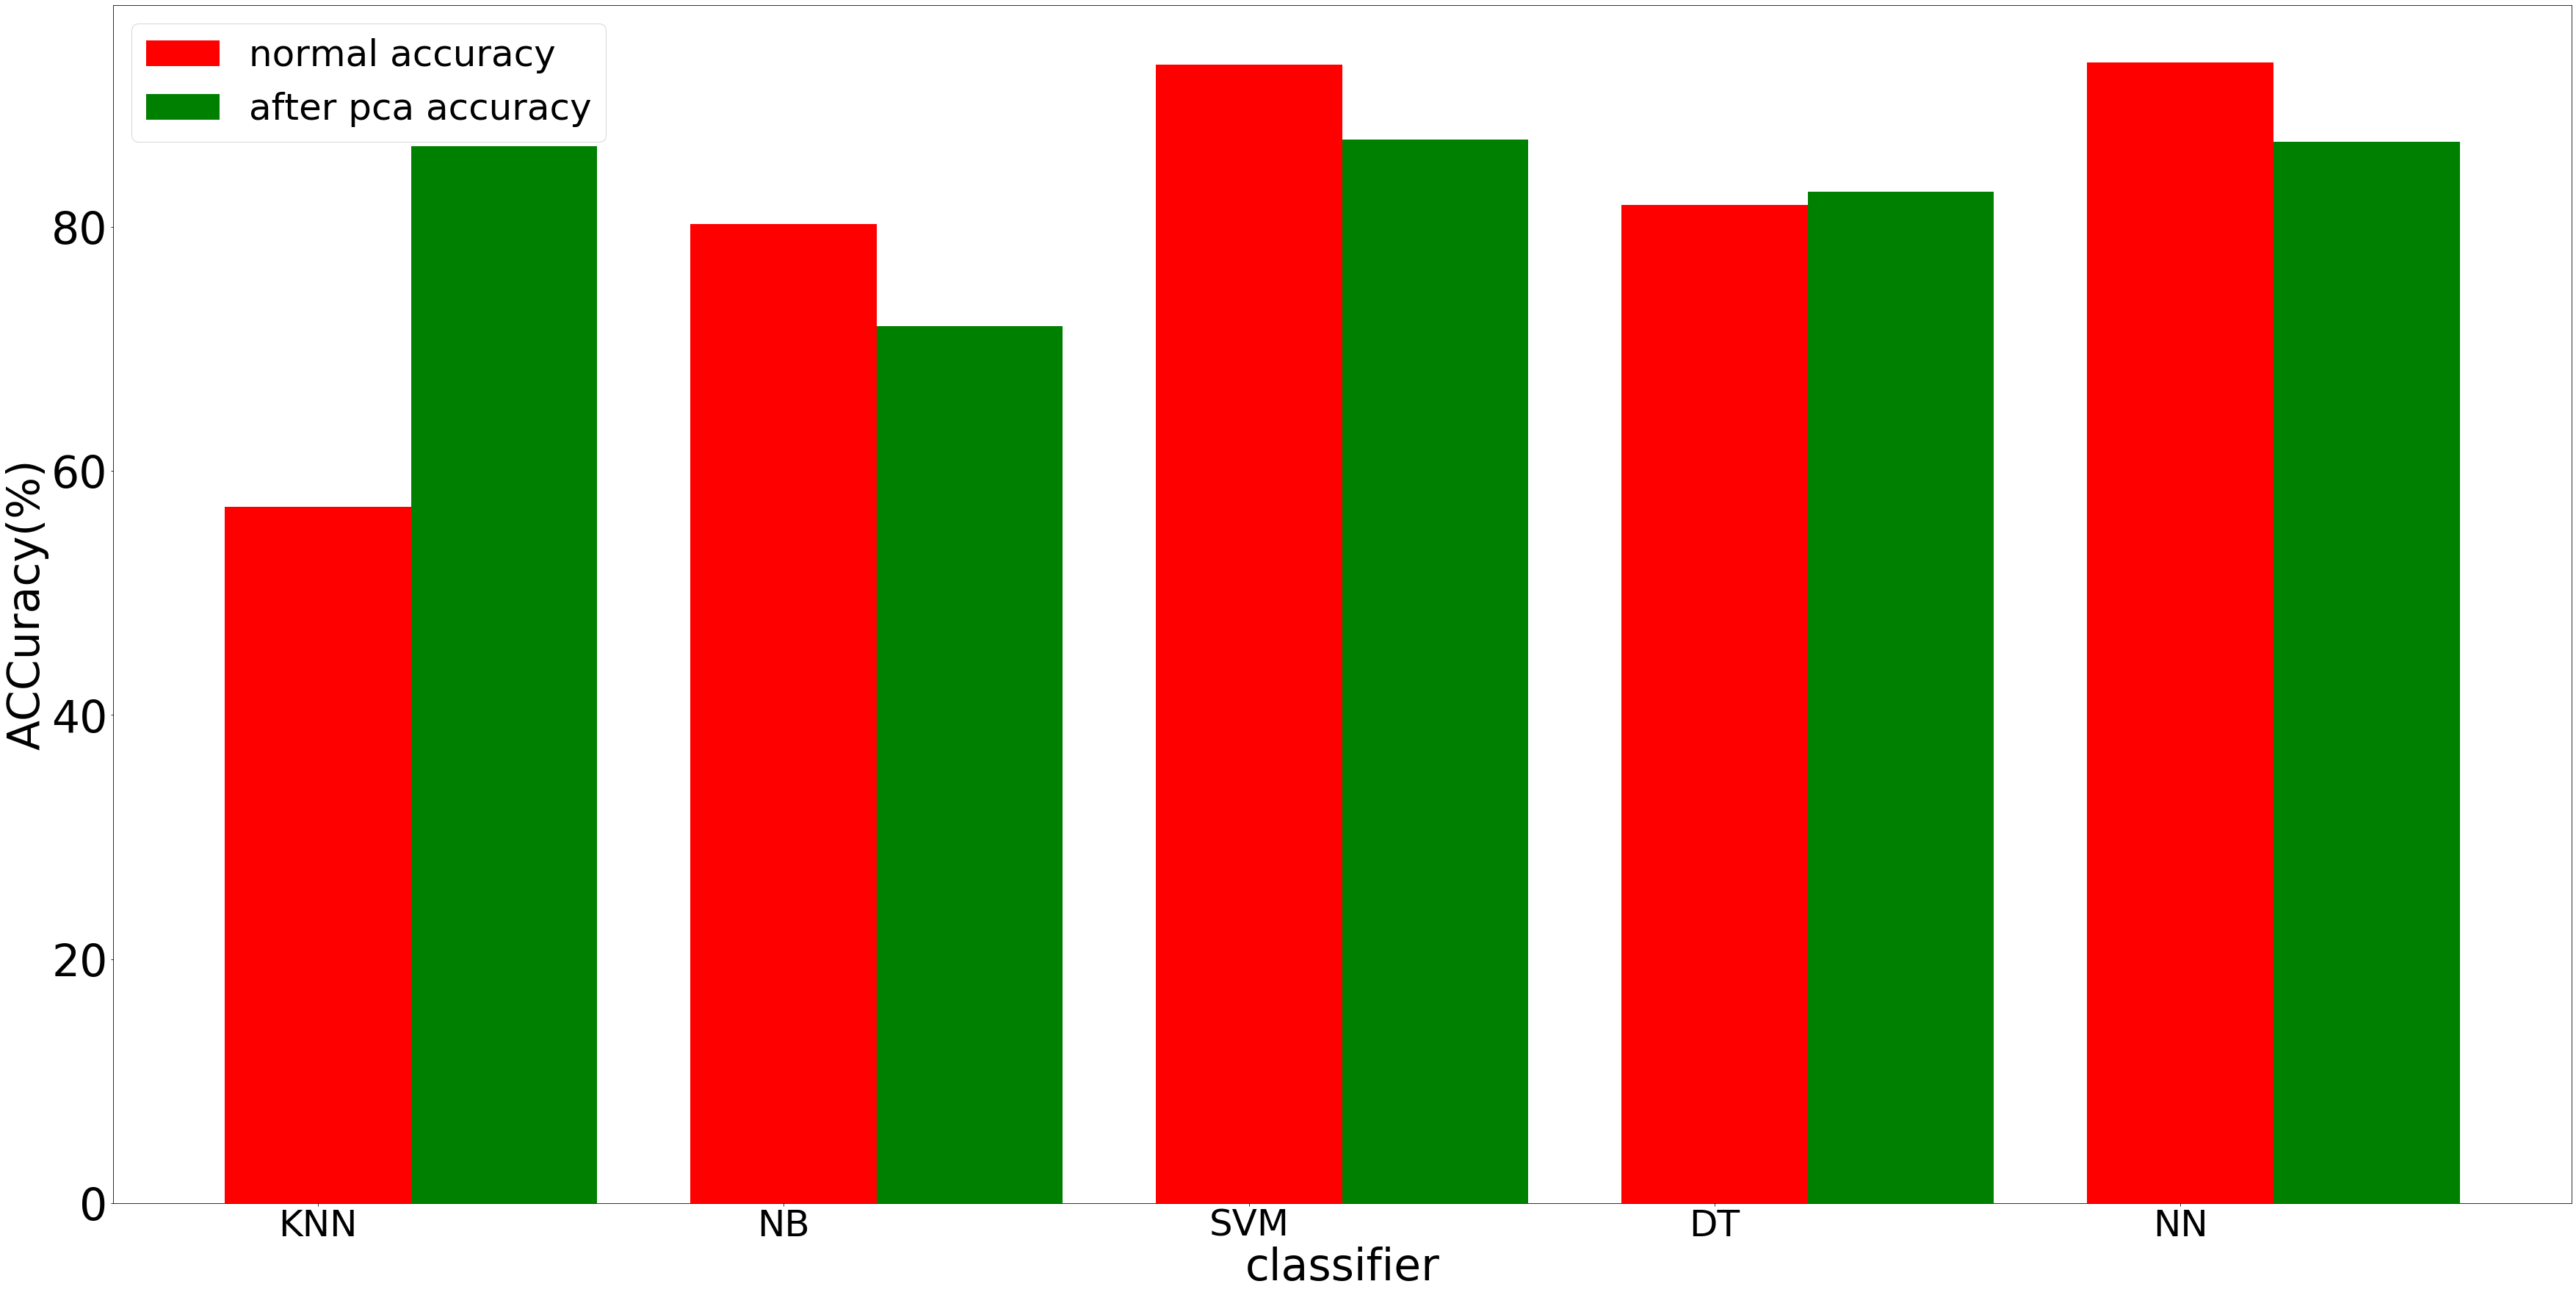

In [52]:
objects = ('KNN', 'NB', 'SVM', 'DT', 'NN')
y_pos = np.arange(len(objects))
x=np.arange(5)
#y=[knn_score.mean(),nb_score.mean(),svm_score.mean(),dt_score.mean(),nn_score.mean()]
y= [knn_score.mean()*100,nb_score.mean()*100,svm_score.mean()*100,dt_score.mean()*100,nn_score.mean()*100]
z= [knn_scorepca.mean()*100,nb_scorepca.mean()*100,svm_scorepca.mean()*100,dt_scorepca.mean()*100,nn_scorepca.mean()*100]
plt.figure(figsize=(60,30))

#z=[knn_scorepca.mean(),nb_scorepca.mean(),svm_scorepca.mean(),dt_scorepca.mean(),nn_scorepca.mean()]
plt.bar(y_pos+0,y,color='r',width=.40,label="normal accuracy")
plt.bar(y_pos+.40,z,color='g',width=.4,label="after pca accuracy")
plt.xticks(y_pos, objects)
plt.ylabel('ACCuracy(%)', size = 60)
plt.xlabel('classifier', size = 60)

plt.xticks(size = 50)
plt.yticks(size = 60)
plt.legend(fontsize=50)
#plt.legend()
plt.show()

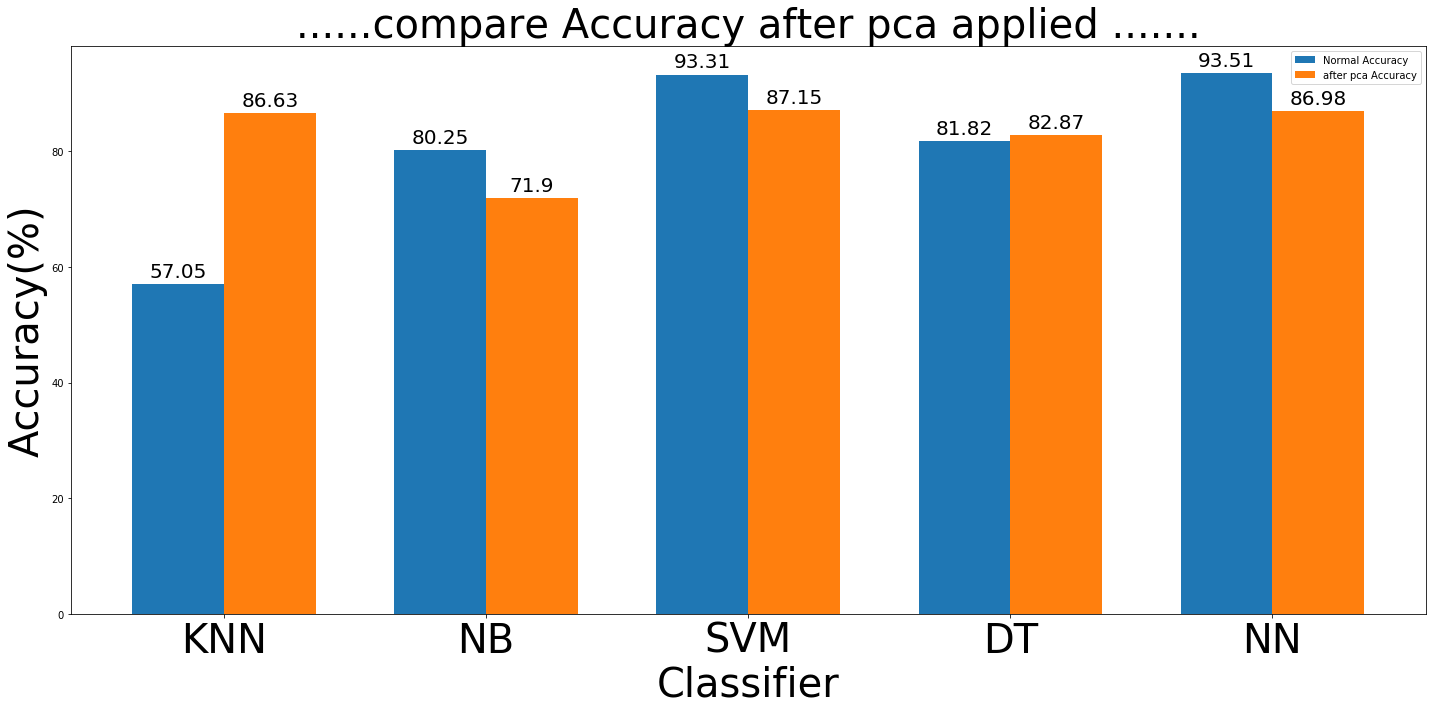

In [99]:
labels = ['KNN', 'NB', 'SVM', 'DT', 'NN']
scorenormal_means = [round(knn_score.mean()*100,2),round(nb_score.mean()*100,2),round(svm_score.mean()*100,2),round(dt_score.mean()*100,2),round(nn_score.mean()*100,2)]
scorepca_means = [round(knn_scorepca.mean()*100,2),round(nb_scorepca.mean()*100,2),round(svm_scorepca.mean()*100,2),round(dt_scorepca.mean()*100,2),round(nn_scorepca.mean()*100,2)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, scorenormal_means, width, label='Normal Accuracy')
rects2 = ax.bar(x + width/2, scorepca_means, width, label='after pca Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy(%)',size=40)
ax.set_xlabel('Classifier',size=40)
ax.set_title('......compare Accuracy after pca applied .......',size=40)
ax.set_xticks(x)
ax.set_xticklabels(labels,size=40)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',size=20)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [53]:
#after apply svd

In [54]:
from sklearn.decomposition import TruncatedSVD

In [55]:
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)

In [56]:
x=svd.fit(X).transform(X)

In [57]:
x

array([[ 0.28343421, -0.08642374, -0.27184266,  0.25534337, -0.22623693],
       [ 0.22013478,  0.09872181,  0.05853745, -0.05358768, -0.07028164],
       [ 0.16099512, -0.14203569, -0.00548176, -0.08944659,  0.01991767],
       ...,
       [ 0.28610554, -0.00300864,  0.01572521, -0.06728622, -0.15954016],
       [ 0.16213583, -0.14118752,  0.02168188, -0.06715193,  0.03060478],
       [ 0.38574371,  0.23928411,  0.15798713, -0.11436433, -0.04312544]])

In [58]:
knn=KNeighborsClassifier(n_neighbors=5)

In [59]:
knn_scoresvd=cross_val_score(knn,x,labels,cv=10)

In [60]:
knn_scoresvd.mean()*100

83.67871684084103

In [61]:
#nb
nb=GaussianNB()
nb_scoresvd=cross_val_score(nb,x,labels,cv=10)

In [62]:
nb_scoresvd.mean()*100

69.25062667882648

In [63]:
#svm
from sklearn import svm
svm1 =svm.SVC()

In [64]:
svm_scoreSVD=cross_val_score(svm1,x,labels,cv=10)

In [65]:
svm_scoreSVD.mean()*100

82.39966909364549

In [66]:
#dt
dt=DecisionTreeClassifier()
dt_scoresvd=cross_val_score(dt,x,labels,cv=10)

In [67]:
dt_scoresvd.mean()*100

79.77952865778602

In [68]:
#accuracy applied svd
knn_scoresvd.mean()*100,nb_scoresvd.mean()*100,svm_scoreSVD.mean()*100,dt_scoresvd.mean()*100

(83.67871684084103, 69.25062667882648, 82.39966909364549, 79.77952865778602)

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,labels,test_size=0.2,random_state=7)

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn=KNeighborsClassifier(n_neighbors=5)

In [72]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [73]:
knn.score(x_test,y_test)

0.8366219415943172

In [74]:
nb=GaussianNB()

In [75]:
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [76]:
nb.score(x_test,y_test)

0.6961325966850829

In [100]:
#after tunkated appliedsvd

In [107]:
knn_scoresvd.mean(),nb_scoresvd.mean(),svm_scoreSVD.mean(),dt_scoresvd.mean(),knn_score.mean(),nb_score.mean(),svm_score.mean(),dt_score.mean()

(0.8367871684084103,
 0.6925062667882648,
 0.8239966909364549,
 0.7977952865778601,
 0.5704818076257967,
 0.8025199216589172,
 0.9330707013320974,
 0.818152007614833)

In [109]:
#Chart bar compare after svd applied

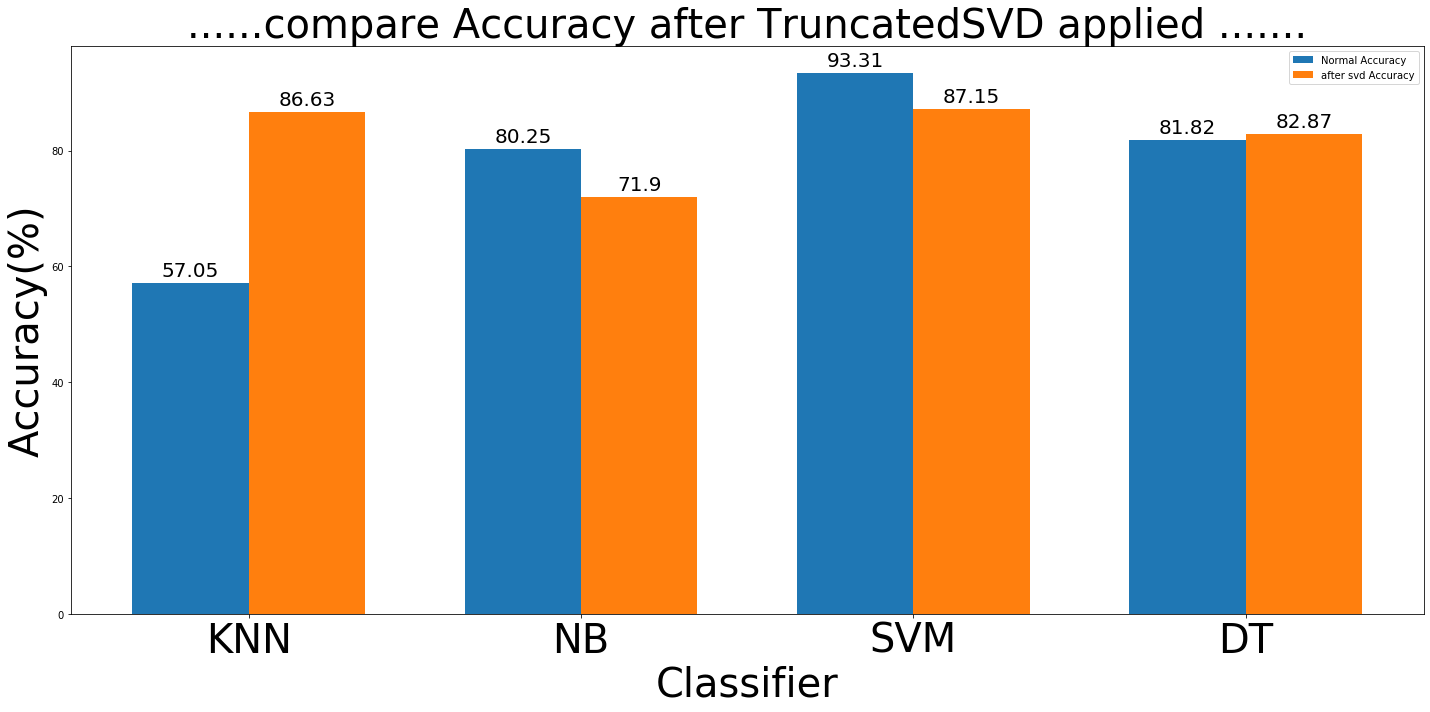

In [113]:
labels = ['KNN', 'NB', 'SVM', 'DT']
scorenormal_means = [round(knn_score.mean()*100,2),round(nb_score.mean()*100,2),round(svm_score.mean()*100,2),round(dt_score.mean()*100,2)]
scorepca_means = [round(knn_scorepca.mean()*100,2),round(nb_scorepca.mean()*100,2),round(svm_scorepca.mean()*100,2),round(dt_scorepca.mean()*100,2)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(x - width/2, scorenormal_means, width, label='Normal Accuracy')
rects2 = ax.bar(x + width/2, scorepca_means, width, label='after svd Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy(%)',size=40)
ax.set_xlabel('Classifier',size=40)
ax.set_title('......compare Accuracy after TruncatedSVD applied .......',size=40)
ax.set_xticks(x)
ax.set_xticklabels(labels,size=40)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',size=20)


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()